## Assignment 4: Tests of correlation using the scipy package with citibike data.

### Data source from notebook citibikes_compare_distributions.ipynb

In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import pylab as pl

%matplotlib inline

In [58]:
def getCitiBikeCSV(datestring):
    
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))

            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

            if '2014' in datestring or '2013' in datestring:
                    os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                              "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

            print("File in place, you can continue.")
            
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
                print("WARNING!!! something is wrong: the file is not there!")
    else:
        print("File in place, you can continue.")

In [59]:
datestring = "201503"
getCitiBikeCSV(datestring)

('Downloading', '201503')
File in place, you can continue.


In [60]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv') #dropna()
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [61]:
df['date'] = pd.to_datetime(df['starttime'])

In [62]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00


In [63]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [64]:
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [116]:
df.drop (['tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid', u'usertype'],axis =1, inplace =1)

In [117]:
df.head()

,birth year,gender,date,ageM,ageF
0,1987.0,1,2015-03-01 00:00:00,28.0,NaN
1,1968.0,1,2015-03-01 00:01:00,47.0,NaN
2,NaN,0,2015-03-01 00:01:00,NaN,NaN
3,1983.0,1,2015-03-01 00:02:00,32.0,NaN
4,1970.0,1,2015-03-01 00:02:00,45.0,NaN


In [118]:
df.describe()

,birth year,gender,ageM,ageF
count,328973.000000,341826.000000,265847.000000,63042.000000
mean,1975.293744,1.146586,39.972492,38.608055
std,11.711420,0.448086,11.724964,11.577399
min,1899.000000,0.000000,16.000000,17.000000
25%,NaN,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN
max,1999.000000,2.000000,116.000000,115.000000


In [119]:
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

In [120]:
df.head()

,birth year,gender,date,ageM,ageF
0,1987.0,1,2015-03-01 00:00:00,28.0,NaN
1,1968.0,1,2015-03-01 00:01:00,47.0,NaN
2,NaN,0,2015-03-01 00:01:00,NaN,NaN
3,1983.0,1,2015-03-01 00:02:00,32.0,NaN
4,1970.0,1,2015-03-01 00:02:00,45.0,NaN


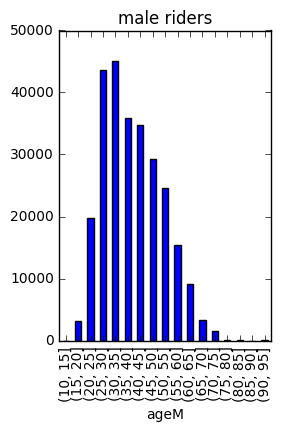

In [121]:
bins = np.arange(10, 99, 5)
fig = pl.figure()

axM = fig.add_subplot(121)

df.ageM.groupby(pd.cut(df.ageM, bins)).agg('count').plot(kind='bar', ax = axM, 
                                                                legend=False)
axM.set_title("male riders")



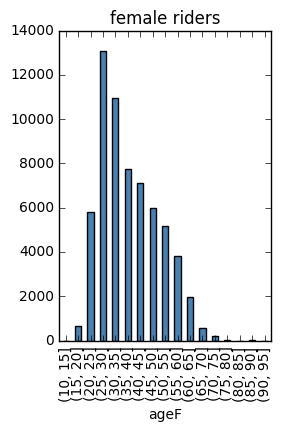

In [122]:
bins = np.arange(10, 99, 5)
fig = pl.figure()

axF = fig.add_subplot(122)

df.ageF.groupby(pd.cut(df.ageF, bins)).agg('count').plot(kind='bar', ax = axF,
                                                                legend=False, color="SteelBlue")
axF.set_title("female riders")

## Figure 1: histogrammed distribution of riders' ages by gender

ageM
(10, 15]    0.000000
(15, 20]    0.001014
(20, 25]    0.016938
(25, 30]    0.059601
(30, 35]    0.063978
(35, 40]    0.051526
(40, 45]    0.033939
(45, 50]    0.018462
(50, 55]    0.007749
(55, 60]    0.010172
(60, 65]    0.006851
(65, 70]    0.003358
(70, 75]    0.000560
(75, 80]    0.000208
(80, 85]    0.000013
(85, 90]    0.000060
(90, 95]    0.000000
dtype: float64


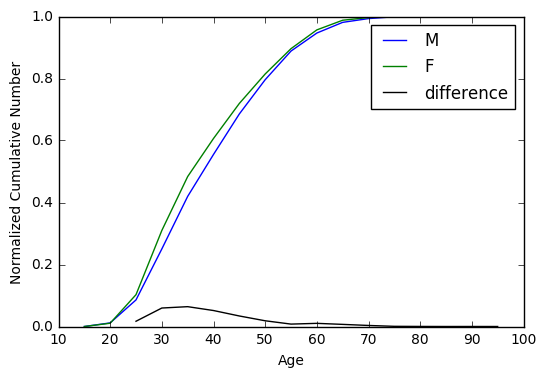

In [123]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg('count').cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg('count').cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

## Figure 2: the cumulative distribution of CitiBike riders' ages by gender

In [124]:
import scipy.stats

# 1. KS tests to compare 2 samples

In [125]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.09203520840462992, pvalue=0.0)


### (alpha = 0.05)  According to this test result (0.092), we can tell that K-S statistic is very small, which means we cannot not reject the null hypothesis that the distributions of the two samples( M and F) are the same. i.e. the 'ageM' and 'ageF' distributions can be the same!

## Now redo the test with a subsample of the data: take only 1 ride every of 200

In [126]:
Redo_df = df[::200]
Redo_df.head()

,birth year,gender,date,ageM,ageF
0,1987.0,1,2015-03-01 00:00:00,28.0,NaN
200,1986.0,2,2015-03-01 02:27:00,NaN,29.0
400,1949.0,2,2015-03-01 07:49:00,NaN,66.0
600,1973.0,1,2015-03-01 09:05:00,42.0,NaN
800,1976.0,1,2015-03-01 09:44:00,39.0,NaN


In [127]:
Redo_df['ageM'].dropna(inplace= True)
Redo_df['ageF'].dropna(inplace= True)

In [128]:
ks = scipy.stats.ks_2samp(Redo_df.ageM, Redo_df.ageF)
print (ks)

Ks_2sampResult(statistic=0.10626272203229993, pvalue=0.0065185917320041671)


### (alpha = 0.05) In this case, the ks statistics result is still very small, so we might have the same conclusion as the previous question did. We can not reject the Null hypothesis (in other words, the two sample distributions can be the same.)

# 2. Pearson's test for correlation
## notice that the Pearson's is a pairwise test: the samples need to be
### a. sorted and
### b. the same size!

In [137]:
print (len(df.ageM))

265847


In [130]:
print (len(df.ageF))

63042


In [131]:
ageM0 = np.random.choice(df.ageM, 63042, replace = False)

In [138]:
M = sorted(df.ageM0)
F = sorted(df.ageF)

In [139]:
scipy.stats.pearsonr(M,F)

(0.99573712067830045, 0.0)

### (alpha = 0.05) Accroding to this Pearson's chi-squared test (0.996), the statisitics result is very to 1, which indicates that the two samples are very likely correlated. So we can reject that the null hypothesis which states there is non-correlation between the two samples.

# 3. Spearman's test for correlation 

In [140]:
scipy.stats.spearmanr(M,F)

SpearmanrResult(correlation=0.99920665798826069, pvalue=0.0)

### (alpha = 0.05) Accroding to this Spearman's test (0.999) , the statisitics result is very to 1, which indicates that the two samples are very likely correlated. So we can reject that the null hypothesis which states there is non-correlation between the two samples.